In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy as cr
import cartopy.feature as cf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
djf = xr.open_dataset('tp.1990.2020.djf.rx5.nc')
jja = xr.open_dataset('tp.1990.2020.jja.rx5.nc')
mam = xr.open_dataset('tp.1990.2020.mam.rx5.nc')
son = xr.open_dataset('tp.1990.2020.son.rx5.nc')

In [3]:
djf_mean = np.mean(djf['highest_five_day_precipitation_amount_per_time_period'],axis=(0))
jja_mean = np.mean(jja['highest_five_day_precipitation_amount_per_time_period'],axis=(0))
mam_mean = np.mean(mam['highest_five_day_precipitation_amount_per_time_period'],axis=(0))
son_mean = np.mean(son['highest_five_day_precipitation_amount_per_time_period'],axis=(0))

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_righ

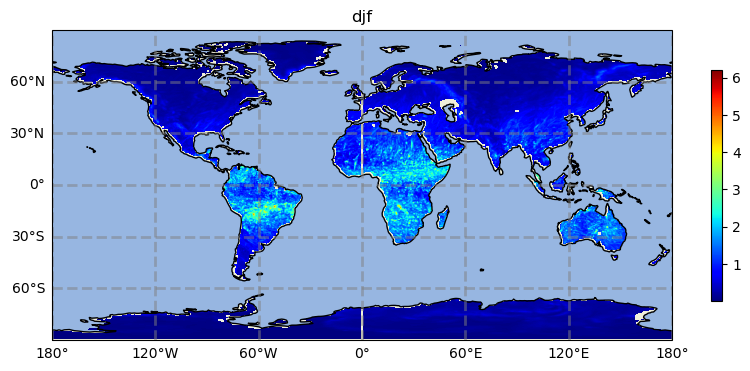

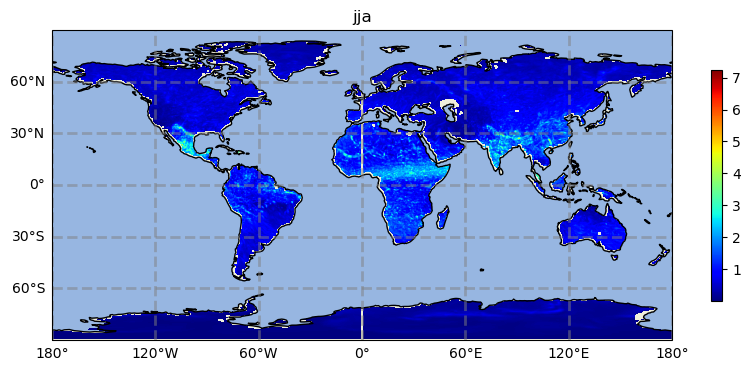

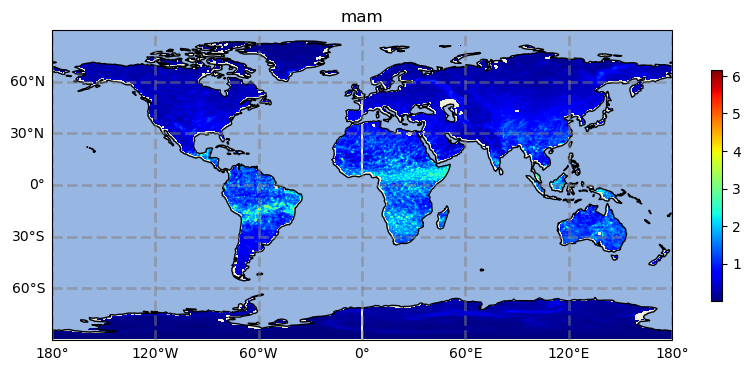

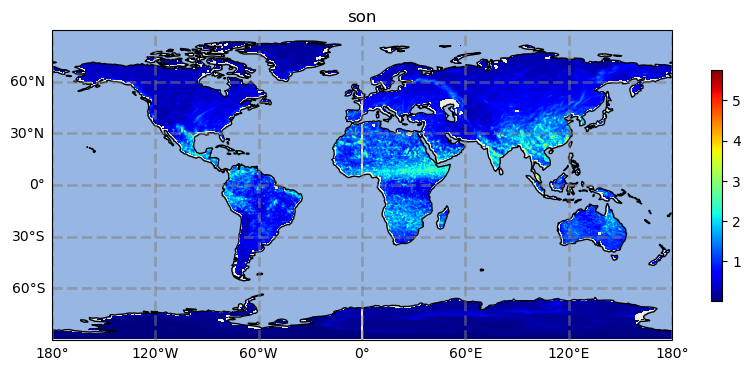

In [4]:
data = [djf_mean,jja_mean,mam_mean,son_mean]
mon = ['djf','jja','mam','son']
for i in range (len(data)):
    lon = data[i].longitude; lat = data[i].latitude
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

    mp = ax.imshow(data[i]*10 ,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')

    ax.add_feature(cf.LAND)
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.OCEAN)

    cbar = fig.colorbar(mp, shrink=0.3)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False

    plt.title(mon[i])
    #plt.savefig('../Assignment-2/plots/fig7/'+mon[i])